<a href="https://colab.research.google.com/github/CristoferSilva/SyntheticTimeSeriesDataser/blob/main/syntheticTimeSeriesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore the creation of a dataset with independent and dependente synthetic times series.

### Helpful links


1.   [Timeseries correlation : instantaneous phase synch](https://www.kaggle.com/code/adepvenugopal/timeseries-correlation-instantaneous-phase-synch)
2.   [How to add a phase shift to a sin wave in the frequency domain with fft?](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)
3. [Danger in performing phase shift with Python for a time series](https://stackoverflow.com/questions/57183126/how-to-add-a-phase-shift-to-a-sin-wave-in-the-frequency-domain-with-fft)



### Imports



In [152]:
%load_ext autoreload
%autoreload 2

%pip install matplotlib
%pip install numpy
%pip install scipy
%pip install joblib

import matplotlib.pyplot as plt
import numpy as np  
from src.time_serie_generator import TimeSerieGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Implementation

### Generate synthetic time series (STS)

In [153]:
tmsg = TimeSerieGenerator()
time_series = tmsg.generate_multiple_time_series(8000,[2,4,8,16,32,64,128,256])
tmsg.save(np.array(time_series).T, 'data/all_SMultipleTimeSeries.csv')

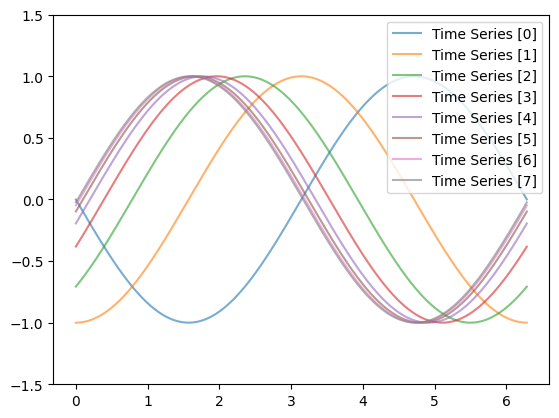

In [154]:
time_series_name = []
count = 0
for _ in time_series:
    time_series_name.append(str(count))
    count += 1
tmsg.plot_time_series(time_series=time_series, time_series_name=time_series_name)

### Add anomaly in STS

#### Diffences between anomaly insertion strategies 

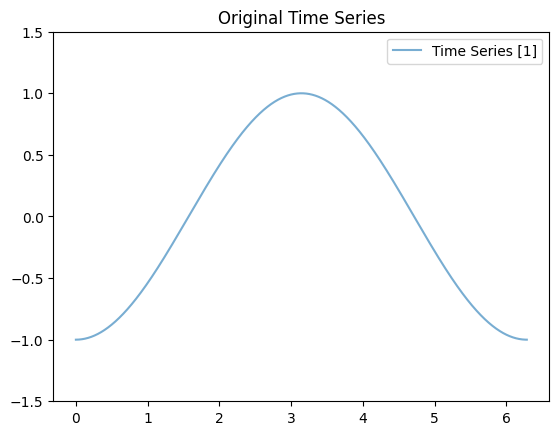

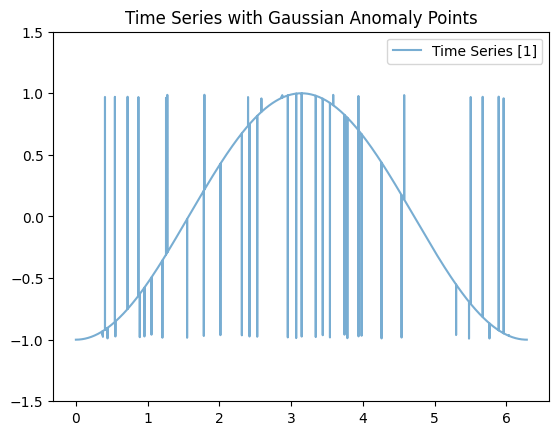

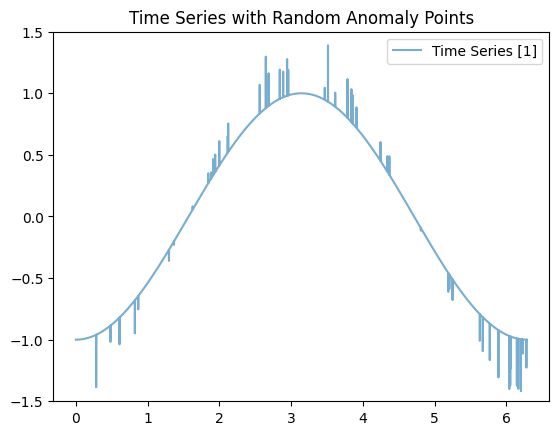

In [155]:
tmsg.plot_time_series([time_series[1]], time_series_name=['1'])
plt.title("Original Time Series")
plt.show()

time_series_1_gaussian_anomaly_points,gaussian_anomaly_labels = tmsg.put_gaussian_anomaly_points(time_series=time_series[1], amount=50)

tmsg.plot_time_series(time_series=[time_series_1_gaussian_anomaly_points], time_series_name=['1'])
plt.title("Time Series with Gaussian Anomaly Points")
plt.show()

time_series_1_random_anomaly_points,random_anomaly_labels = tmsg.put_anomaly_points(time_serie=time_series[1], amount=50)

tmsg.plot_time_series(time_series=[time_series_1_random_anomaly_points], time_series_name=['1'])
plt.title("Time Series with Random Anomaly Points")
plt.show()

In [156]:
anomaly_gaussian_index, = np.where(gaussian_anomaly_labels == 1)
anomaly_random_index, = np.where(random_anomaly_labels == 1)
ts1 = time_series[1].reshape(time_series[1].shape[0],1)

print('Are the Gaussian Anomaly Points in the original time series? ' +str(time_series_1_gaussian_anomaly_points[anomaly_gaussian_index] in ts1))
print('Are the Random Anomaly Points in the original time series? ' +str(time_series_1_random_anomaly_points[anomaly_random_index] in ts1))

Are the Gaussian Anomaly Points in the original time series? True
Are the Random Anomaly Points in the original time series? False


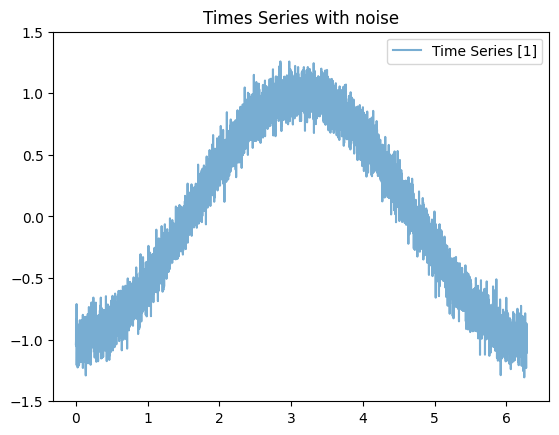

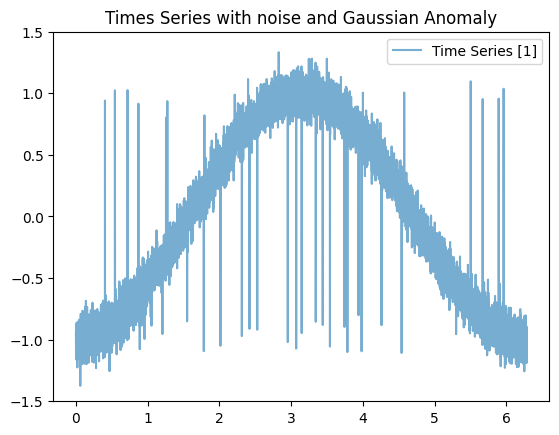

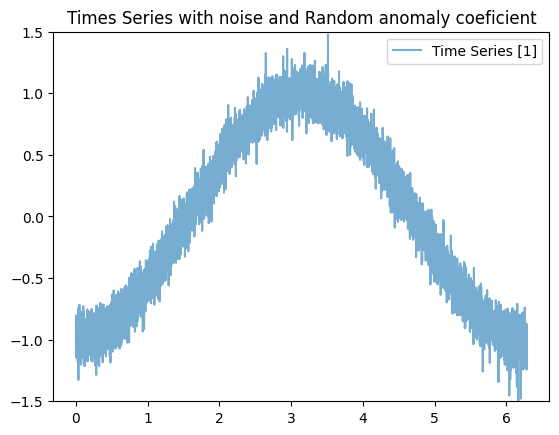

In [157]:
time_series_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series[1]])
tmsg.plot_time_series(time_series=time_series_with_noise, time_series_name=['1'])
plt.title("Times Series with noise")
plt.show()

time_series_gaussian_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series_1_gaussian_anomaly_points])
tmsg.plot_time_series(time_series=time_series_gaussian_with_noise, time_series_name=['1'])
plt.title("Times Series with noise and Gaussian Anomaly")
plt.show()

time_series_random_with_noise = tmsg.generate_multiple_time_series_with_noise([time_series_1_random_anomaly_points])
tmsg.plot_time_series(time_series=time_series_random_with_noise, time_series_name=['1'])
plt.title("Times Series with noise and Random anomaly coeficient")
plt.show()

#### Add Gaussian Anomaly Points

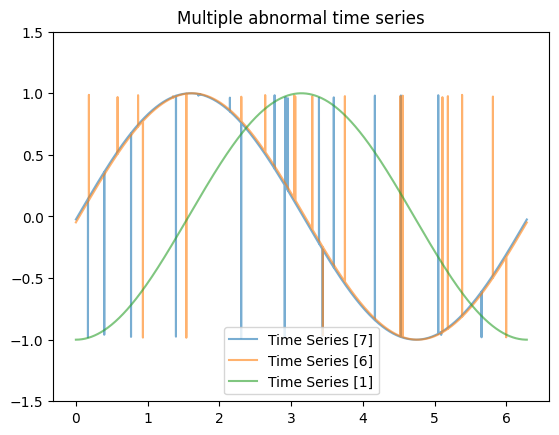

In [158]:
time_series_gaussian_anomaly = time_series.copy()
time_series_gaussian_anomaly[7],_ = tmsg.put_gaussian_anomaly_points(time_series=time_series_gaussian_anomaly[7], amount=20)
time_series_gaussian_anomaly[6],_ = tmsg.put_gaussian_anomaly_points(time_series=time_series_gaussian_anomaly[6], amount=20)

tmsg.plot_time_series(time_series=[time_series_gaussian_anomaly[7],time_series_gaussian_anomaly[6], time_series_gaussian_anomaly[1]],time_series_name=['7', '6', '1'])
plt.title("Multiple abnormal time series")
plt.show()

### Add noise in STS

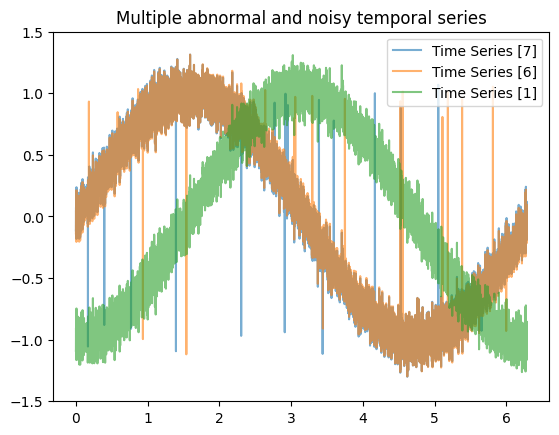

In [159]:
time_series_with_noise = tmsg.generate_multiple_time_series_with_noise(time_series_gaussian_anomaly)
tmsg.plot_time_series(time_series=[time_series_with_noise[7], time_series_with_noise[6],time_series_with_noise[1]], time_series_name=['7', '6', '1'])
plt.title("Multiple abnormal and noisy temporal series")
plt.show()

### Calculate correlations confidence intervals between STS

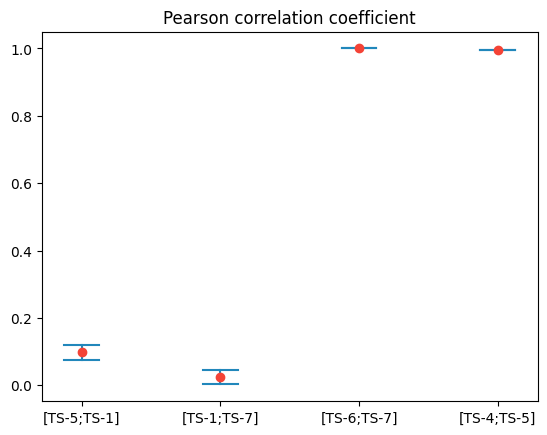

In [160]:
tmsg.plot_confidence_interval([[time_series[5],time_series[1]], [time_series[1],time_series[7]], [time_series[6],time_series[7]], [time_series[4],time_series[5]]], ['[TS-5;TS-1]', '[TS-1;TS-7]', '[TS-6;TS-7]', '[TS-4;TS-5]'])

### Saving STS dataset to train and test

#### Generate data without anomaly to train

##### Dependent STS

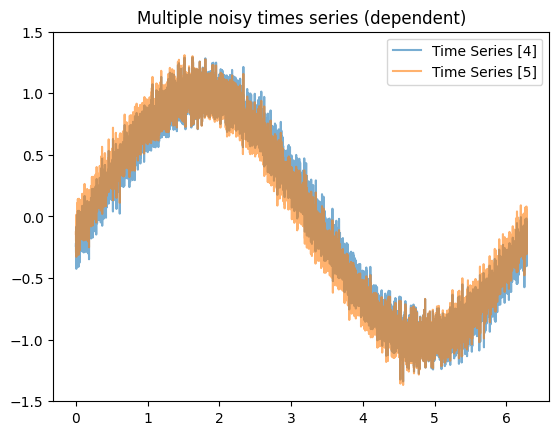

In [161]:
dependent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[4], time_series[5]])
tmsg.plot_time_series(time_series=dependent_time_series, time_series_name=['4', '5']) 
plt.title("Multiple noisy times series (dependent)")
plt.show()

##### Independent STS

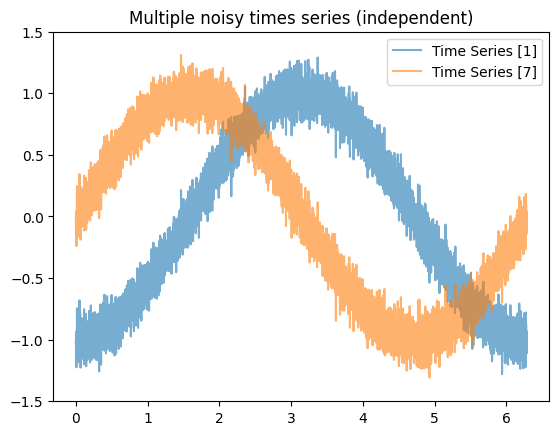

In [162]:
independent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[1], time_series[7]])
tmsg.plot_time_series(time_series=independent_time_series, time_series_name=['1', '7'])
plt.title("Multiple noisy times series (independent)")
plt.show()

##### Saving MSTS datasets

In [163]:
tmsg.save(np.array(dependent_time_series).T, 'data/train/normal/sts_dependent_train.csv')
tmsg.save(np.array(independent_time_series).T, 'data/train/normal/sts_independent_train.csv')

#### Generate data with anomaly to test

##### Dependent STS

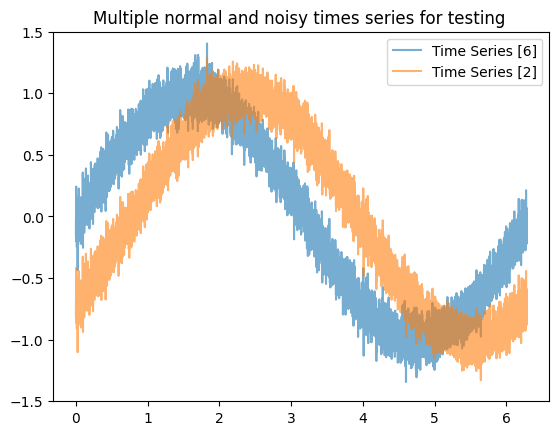

In [164]:
dependent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[6], time_series[2]])
tmsg.save(np.array(dependent_time_series).T, 'data/test/normal/sts_test.csv')
tmsg.plot_time_series(time_series=[dependent_time_series[0], dependent_time_series[1]], time_series_name=['6', '2'])
plt.title("Multiple normal and noisy times series for testing ")
plt.show()

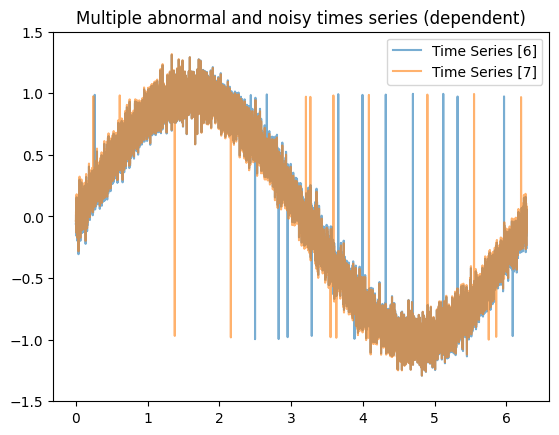

In [165]:
dependent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[6], time_series[7]])


dependent_time_series[0],test_labels_dependent_1 = tmsg.put_gaussian_anomaly_points(time_series=dependent_time_series[0], amount=20)
dependent_time_series[1],test_labels_dependent_2 = tmsg.put_gaussian_anomaly_points(time_series=dependent_time_series[1], amount=20)

#Union Labels
test_labels_dependent = test_labels_dependent_1.copy()
test_labels_dependent[test_labels_dependent_2 == 1] = 1

tmsg.plot_time_series(time_series=dependent_time_series, time_series_name=['6', '7'])
plt.title("Multiple abnormal and noisy times series (dependent)")
plt.show()

##### Independent STS

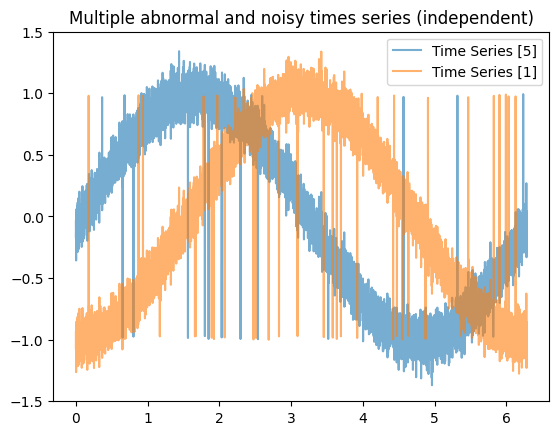

In [166]:
independent_time_series = tmsg.generate_multiple_time_series_with_noise([time_series[5], time_series[1]])
independent_time_series[0],test_labels_independent_1 = tmsg.put_gaussian_anomaly_points(time_series=independent_time_series[0], amount=25)
independent_time_series[1],test_labels_independent_2 = tmsg.put_gaussian_anomaly_points(time_series=independent_time_series[1], amount=50)

#Union Labels
test_labels_independent = test_labels_independent_1.copy()
test_labels_independent[test_labels_independent_2 == 1] = 1

tmsg.plot_time_series(time_series=independent_time_series, time_series_name=['5', '1'])
plt.title("Multiple abnormal and noisy times series (independent)")
plt.show()

##### Save STS datasets to test

In [167]:
tmsg.save(np.array(dependent_time_series).T, 'data/test/abnormal/sts_dependent_test.csv')
tmsg.save(np.array(test_labels_dependent), 'data/test/abnormal/sts_dependent_test_labels.csv')
tmsg.save(np.array(independent_time_series).T, 'data/test/abnormal/sts_independent_test.csv') 
tmsg.save(np.array(test_labels_independent), 'data/test/abnormal/sts_independent_test_labels.csv')